# Emotion detection


### Importing related Libraries 

In [1]:
import pandas as pd
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from textblob import TextBlob

C:\Users\chiku\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\chiku\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\chiku\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Store the dataset into the Dataframe


In [2]:
data=pd.read_csv(r"E:\intern_assignment\data.csv")
data

,text,sentiment
0,@angelemotion yayyy for new videos by amazing ...,happiness
1,Surgery when I wake up,neutral
2,@ScylisSynaptic NO WAY MAN! i like 21 year olds,surprise
3,Just look @ this hellacious desk...good grief ...,hate
4,@ModelTheany tee we beefin....what was u supp...,surprise
...,...,...
31995,as any1 been up all night like me and now the ...,neutral
31996,"Not going to Suffolk tomorrow. However, now ...",happiness
31997,i really wanna play....,happiness
31998,"@DavidArchie Hey David, I'm wondering if you r...",happiness


In [3]:
data.head()

,text,sentiment
0,@angelemotion yayyy for new videos by amazing ...,happiness
1,Surgery when I wake up,neutral
2,@ScylisSynaptic NO WAY MAN! i like 21 year olds,surprise
3,Just look @ this hellacious desk...good grief ...,hate
4,@ModelTheany tee we beefin....what was u supp...,surprise


In [4]:
data.shape

(32000, 2)

In [5]:
data.describe()

,text,sentiment
count,32000,32000
unique,31884,13
top,I just received a mothers day card from my lov...,neutral
freq,13,6910


## Data Cleaning

In [6]:
data.isnull()

,text,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
31995,False,False
31996,False,False
31997,False,False
31998,False,False


In [7]:
data.isnull().sum()

text         0
sentiment    0
dtype: int64

In [8]:
import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chiku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Making statement text in lower case

In [9]:
data['text']=data['text'].str.lower()
data['text'].head()

0    @angelemotion yayyy for new videos by amazing ...
1                               surgery when i wake up
2      @scylissynaptic no way man! i like 21 year olds
3    just look @ this hellacious desk...good grief ...
4    @modeltheany  tee we beefin....what was u supp...
Name: text, dtype: object

In [54]:
data['sentiment'].unique()

array(['happiness', 'neutral', 'other', 'love', 'sadness', 'worry'],
      dtype=object)

## Cleaning and removing the above stop words list from the text

In [10]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

0        @angelemotion yayyy new videos amazing people
1                                         surgery wake
2           @scylissynaptic way man! like 21 year olds
3    look @ hellacious desk...good grief http://sho...
4    @modeltheany tee beefin....what u supposed lea...
Name: text, dtype: object

## Removing punctuation, numbers and special characters
### This will replace everything except characters and hashtags with spaces. "[^a-zA-Z#]" this regular expression means everything except alphabets and hashtags.
### Cleaning and removing punctuations

In [11]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].head()


0       angelemotion yayyy new videos amazing people
1                                       surgery wake
2           scylissynaptic way man like 21 year olds
3    look  hellacious deskgood grief httpshorttocevd
4       modeltheany tee beefinwhat u supposed leavin
Name: text, dtype: object

## Cleaning and removing repeating characters

In [12]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['text'] =data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].head()

0       angelemotion yayyy new videos amazing people
1                                       surgery wake
2            scylissynaptic way man like 1 year olds
3    look  hellacious deskgood grief httpshorttocevd
4       modeltheany tee beefinwhat u supposed leavin
Name: text, dtype: object

## Cleaning and removing URL’s

In [13]:

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['text'] =data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].head()

0       angelemotion yayyy new videos amazing people
1                                       surgery wake
2            scylissynaptic way man like 1 year olds
3    look  hellacious deskgood grief httpshorttocevd
4       modeltheany tee beefinwhat u supposed leavin
Name: text, dtype: object

## Cleaning and removing Numeric numbers

In [14]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', ' ', data)
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].head()

0       angelemotion yayyy new videos amazing people
1                                       surgery wake
2            scylissynaptic way man like   year olds
3    look  hellacious deskgood grief httpshorttocevd
4       modeltheany tee beefinwhat u supposed leavin
Name: text, dtype: object

## Remove short words
### We remove those words which are of little or no use. So, we will select the length of words which we want to remove

In [15]:
def transform_text(text):
    return ' '.join([word for word in text.split() if len(word) > 2])
data['text'] = data['text'].apply(lambda x: transform_text(x))
data['text'].head() 

0      angelemotion yayyy new videos amazing people
1                                      surgery wake
2             scylissynaptic way man like year olds
3    look hellacious deskgood grief httpshorttocevd
4        modeltheany tee beefinwhat supposed leavin
Name: text, dtype: object

# Tokenization

#### Tokenization is b reaking the raw text into small chunks. Tokenization breaks the raw text into words, sentences called tokens. These tokens help in understanding the context or developing the model for the NLP. The tokenization helps in interpreting the meaning of the text by analyzing the sequence of the words.

In [16]:
# Function which directly tokenize the tweet data
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
data['text'] =data['text'].apply(tt.tokenize)
data['text'] .head()

0    [angelemotion, yayyy, new, videos, amazing, pe...
1                                      [surgery, wake]
2         [scylissynaptic, way, man, like, year, olds]
3    [look, hellacious, deskgood, grief, httpshortt...
4     [modeltheany, tee, beefinwhat, supposed, leavin]
Name: text, dtype: object

## Applying Stemming

In [17]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
data['text']= data['text'].apply(lambda x: stemming_on_text(x))
data['text'].head()

0    [angelemotion, yayyy, new, videos, amazing, pe...
1                                      [surgery, wake]
2         [scylissynaptic, way, man, like, year, olds]
3    [look, hellacious, deskgood, grief, httpshortt...
4     [modeltheany, tee, beefinwhat, supposed, leavin]
Name: text, dtype: object

## Applying Lemmatizer

In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chiku\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
data['text'] =data['text'].apply(lambda x: lemmatizer_on_text(x))
data['text'].head()


0    [angelemotion, yayyy, new, videos, amazing, pe...
1                                      [surgery, wake]
2         [scylissynaptic, way, man, like, year, olds]
3    [look, hellacious, deskgood, grief, httpshortt...
4     [modeltheany, tee, beefinwhat, supposed, leavin]
Name: text, dtype: object

In [20]:
data.sentiment.value_counts()

neutral       6910
worry         6767
happiness     4167
sadness       4132
love          3074
surprise      1750
fun           1421
relief        1221
hate          1058
empty          662
enthusiasm     607
boredom        143
anger           88
Name: sentiment, dtype: int64

<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='sentiment', ylabel='count'>

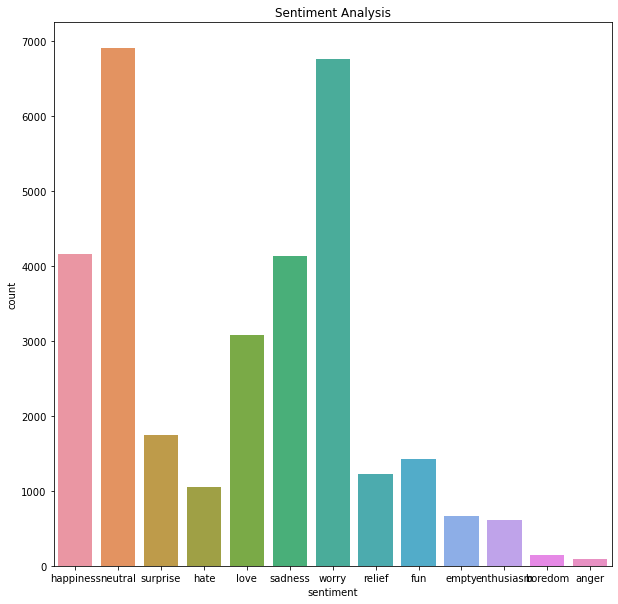

In [21]:
plt.figure(figsize=[10,10])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
sns.countplot(x = 'sentiment', data = data)


# Data Exploration
### Let's form a WordCloud
A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes

In [22]:
data['sentiment'].unique()

array(['happiness', 'neutral', 'surprise', 'hate', 'love', 'sadness',
       'worry', 'relief', 'fun', 'empty', 'enthusiasm', 'boredom',
       'anger'], dtype=object)

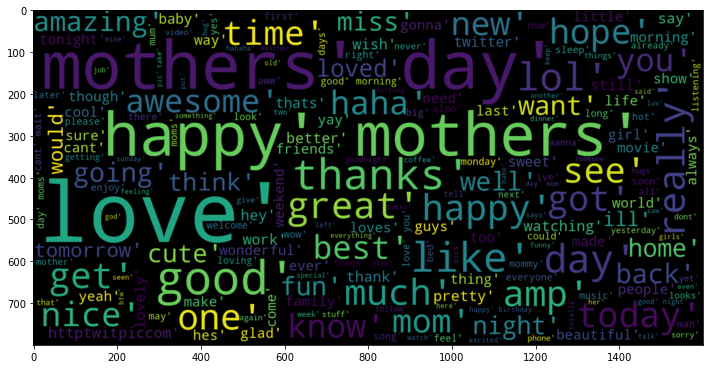

In [23]:
l_t=data[data.sentiment=='love']
l_s=[]
for t in l_t.text:
    l_s.append(t)
l_s=pd.Series(l_s).astype(str).str.cat(sep=' ')
from wordcloud import WordCloud


wordcloud= WordCloud(width=1600,height=800,max_font_size=200).generate(l_s)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis=("off")
plt.show()

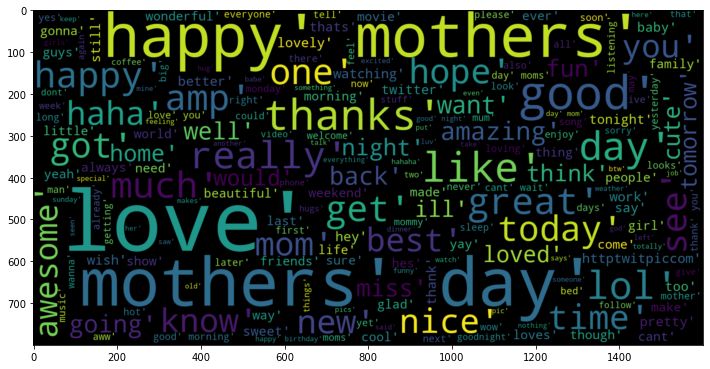

In [24]:
h_t=data[data.sentiment=='happiness']
h_s=[]
for t in h_t.text:
    h_s.append(t)
h_s=pd.Series(h_s).astype(str).str.cat(sep=' ')
from wordcloud import WordCloud


wordcloud= WordCloud(width=1600,height=800,max_font_size=200).generate(l_s)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation="bilinear")

plt.axis=("off")
plt.show()

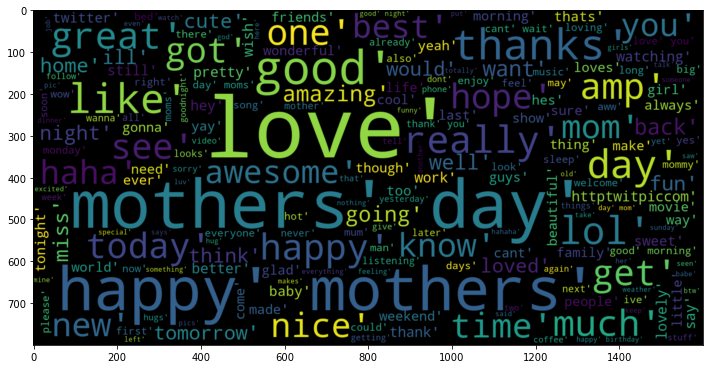

In [25]:
w_t=data[data.sentiment=='worry']
w_s=[]
for t in w_t.text:
    w_s.append(t)
w_s=pd.Series(w_s).astype(str).str.cat(sep=' ')
from wordcloud import WordCloud


wordcloud= WordCloud(width=1600,height=800,max_font_size=200).generate(l_s)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis=("off")
plt.show()

In [26]:
data['sentiment'].unique()

array(['happiness', 'neutral', 'surprise', 'hate', 'love', 'sadness',
       'worry', 'relief', 'fun', 'empty', 'enthusiasm', 'boredom',
       'anger'], dtype=object)

In [27]:
data['sentiment'] = data['sentiment'].apply(lambda x : x if x in ['happiness', 'sadness', 'worry', 'neutral', 'love'] else "other")

In [28]:
data

,text,sentiment
0,"[angelemotion, yayyy, new, videos, amazing, pe...",happiness
1,"[surgery, wake]",neutral
2,"[scylissynaptic, way, man, like, year, olds]",other
3,"[look, hellacious, deskgood, grief, httpshortt...",other
4,"[modeltheany, tee, beefinwhat, supposed, leavin]",other
...,...,...
31995,"[night, like, birds, keeping, awake]",neutral
31996,"[going, suffolk, tomorrow, however, amp, plann...",happiness
31997,"[really, wanna, play]",happiness
31998,"[davidarchie, hey, david, wondering, received,...",happiness


In [29]:
maximum_text = len(max((data["text"])))
print(maximum_text)

14


In [30]:
from keras.preprocessing.text import Tokenizer

In [31]:
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 43120 unique tokens.


In [32]:
X = tokenizer.texts_to_sequences(data['text'].values)

In [33]:
len(X)

32000

In [34]:
from keras.preprocessing.sequence import pad_sequences

In [35]:
X = pad_sequences(X, maxlen=300)

In [36]:
X.shape

(32000, 300)

In [37]:
Y = pd.get_dummies(data['sentiment'],columns=data["sentiment"]).values

In [38]:
len(Y)

32000

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(28800, 300) (28800, 6)
(3200, 300) (3200, 6)


In [40]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
model=Sequential()
model.add(Embedding(50000,50,input_length=300))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 50)           2500000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 50)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 2,561,006
Trainable params: 2,561,006
Non-trainable params: 0
_________________________________________________________________


In [42]:
from keras.callbacks import EarlyStopping
history = model.fit(X_train, Y_train, epochs=10, batch_size=64,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
405/405 [==============================] - 275s 673ms/step - loss: 1.6652 - accuracy: 0.2812 - val_loss: 1.5689 - val_accuracy: 0.3344
Epoch 2/10
405/405 [==============================] - 264s 651ms/step - loss: 1.4251 - accuracy: 0.4268 - val_loss: 1.5517 - val_accuracy: 0.3587
Epoch 3/10
405/405 [==============================] - 264s 653ms/step - loss: 1.0936 - accuracy: 0.5894 - val_loss: 1.7459 - val_accuracy: 0.3458
Epoch 4/10
405/405 [==============================] - 262s 646ms/step - loss: 0.7628 - accuracy: 0.7323 - val_loss: 1.9991 - val_accuracy: 0.3260
Epoch 5/10
405/405 [==============================] - 265s 655ms/step - loss: 0.5517 - accuracy: 0.8118 - val_loss: 2.1779 - val_accuracy: 0.3132


In [43]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

100/100 [==============================] - 7s 62ms/step - loss: 2.1933 - accuracy: 0.3066
Test set
  Loss: 2.193
  Accuracy: 0.307


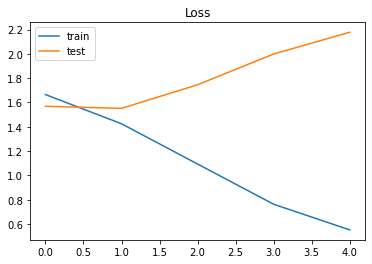

In [44]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

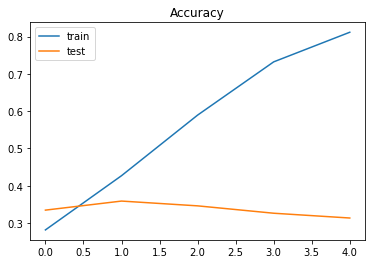

In [45]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();